<h1>AUTHOR: UVIETOBORE JOSHUA ADJUGAH</h1>

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')
gen_sum = pd.read_csv('gender_submission.csv')

In [103]:
test_set = test_set.merge(right=gen_sum, on='PassengerId')
dataset = pd.concat([train_set, test_set])

In [104]:
dataset.shape

(1309, 12)

In [105]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [106]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [107]:
dataset.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [108]:
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())
dataset['Fare'] = dataset['Fare'].fillna(dataset['Age'].mean())

In [109]:
dataset['Cabin'] = dataset['Cabin'].fillna(dataset['Cabin'].mode()[0])
dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])

In [110]:
dataset.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

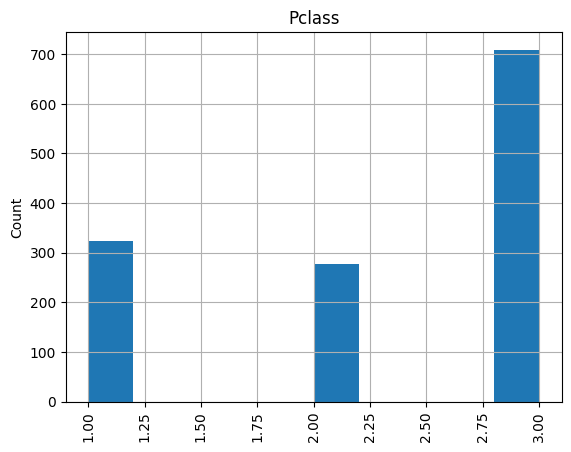

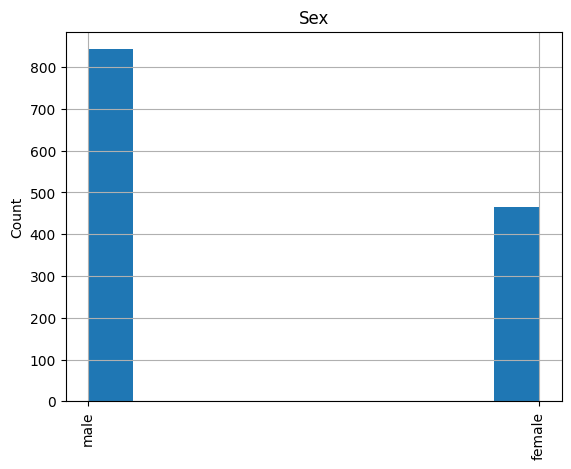

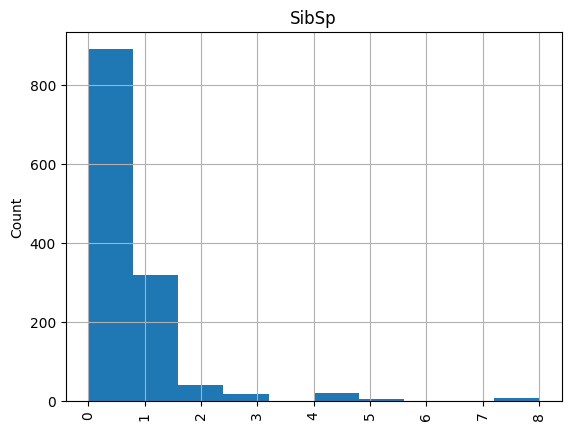

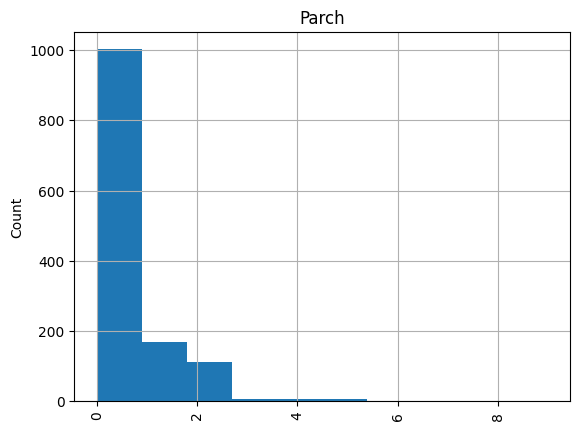

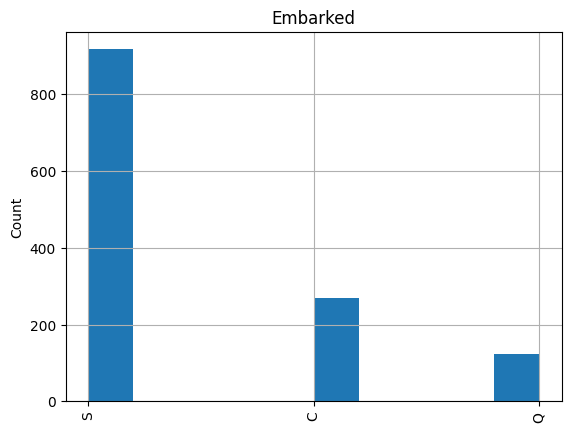

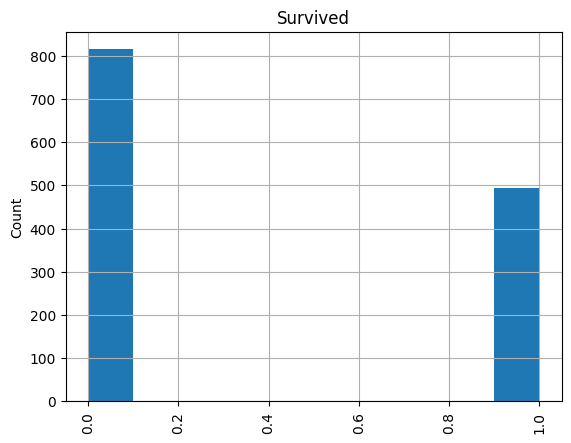

In [111]:
plot_columns = ['Pclass','Sex','SibSp','Parch','Embarked','Survived']
for column in plot_columns:
    dataset[column].hist()
    plt.title(column)
    plt.xticks(rotation=90)
    plt.ylabel('Count')
    plt.show()

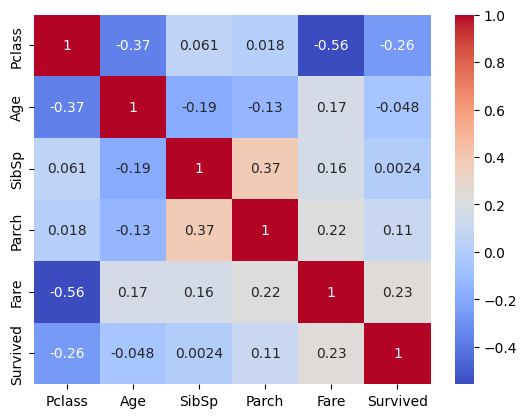

In [112]:
num_col = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']
sns.heatmap(dataset[num_col].corr(), annot=True, cmap='coolwarm')
plt.show()

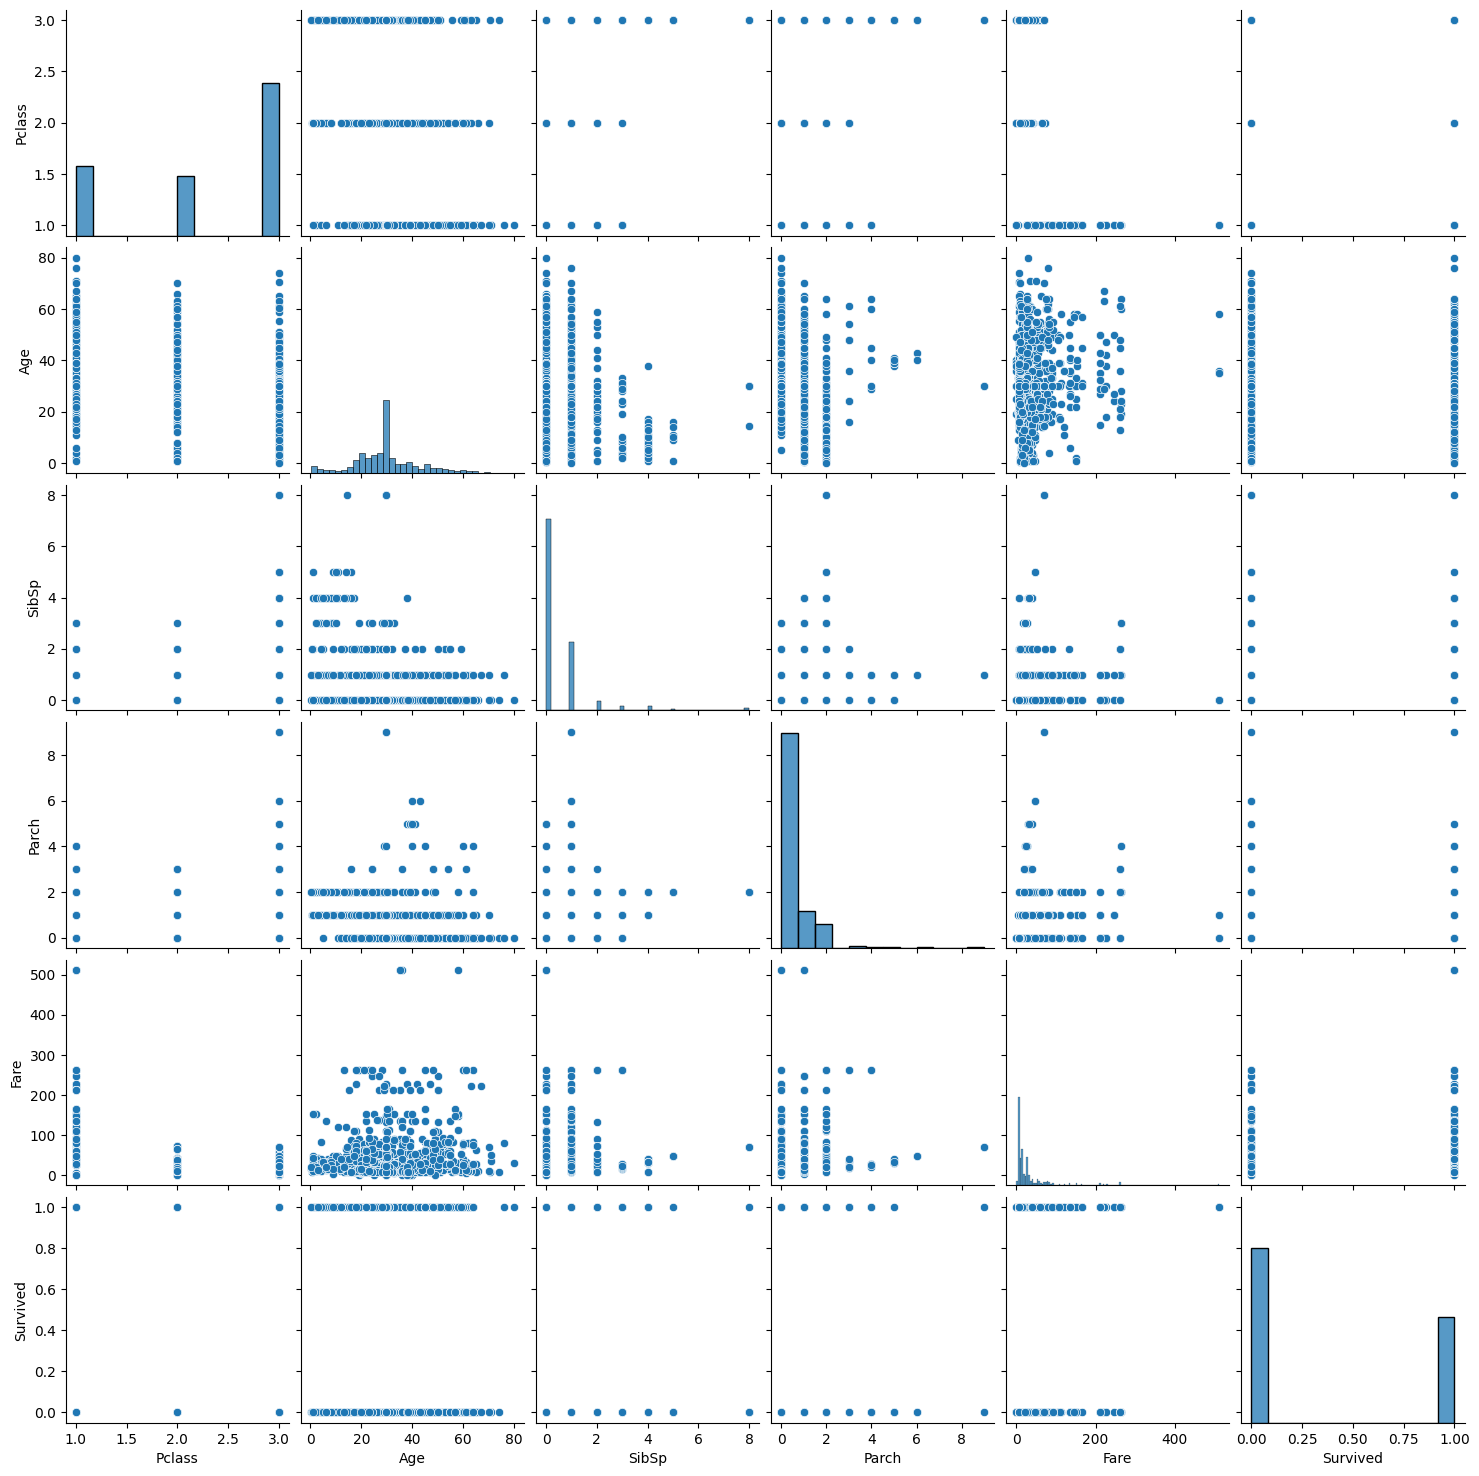

In [113]:
sns.pairplot(dataset[num_col])
plt.show()